# Direct methods of numerical minimization of unimodal functions

In [48]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [49]:
#brute-force-method
def BruteForce(f, a, b, eps):
    n = math.ceil((b - a)/eps)
    count_calculate = 0
    count_iteration = 0
    
    x_min = a
    f_min = f(a)  
    count_calculate += 1
    count_iteration += 1
    
    for i in range(1, n + 1):
        count_calculate += 1
        if(f(a + i * (b - a) / n) < f_min):
            count_iteration += 1 
            x_min = a + i * (b - a) / n
            f_min = f(a + i * (b - a) / n)
    
#     print("Понадобилось вычислений: " + str(count_calculate))
#     print("Метод сошелся за: " + str(count_iteration))

    return x_min, f_min, count_calculate, count_iteration

In [50]:
#bitwise-search-method
def BitwiseSearch(f, a, b, eps):
    count_calculate = 1
    count_iteration = 0
    
    d = (b - a) / 4.0
    x_min = a
    f_min = f(a)
    
    while ((abs(d) > eps)):
        count_iteration += 1
        if (f_min > f(x_min + d)):
            count_calculate += 1
            f_min = f(x_min + d)
            x_min = x_min + d
        else:
            d = - d / 4.0
            
#     print("Понадобилось вычислений: " + str(count_calculate))
#     print("Метод сошелся за: " + str(count_iteration))
            
    return x_min, f_min, count_calculate, count_iteration

In [51]:
#dichotomy-method
def Dichotomy(f, a, b, eps):
    delta = eps
    eps_n = (b - a) / 2    
    
    count_calculate = 0
    count_iteration = 0
    
    while (eps_n > eps):
        x1    = (b + a - delta) / 2
        x2    = (b + a + delta) / 2
        count_calculate += 2
        count_iteration += 1
        if (f(x1) <= f(x2)):
            b = x2
            eps_n = (b - a) / 2
        else:
            a = x1
            eps_n = (b - a) / 2
    
#     print("Понадобилось вычислений: " + str(count_calculate))
#     print("Метод сошелся за: " + str(count_iteration))
    
    return (b + a) / 2, f((b + a) / 2), count_calculate, count_iteration

In [52]:
#golden-section-method
def GoldenSection(f, a, b, eps):
    count_calculate = 2
    count_iteration = 1
    
    tau = (np.sqrt(5) - 1) / 2
    x1 = a + (1.0 - tau) / 2.0 * (b - a)
    x2 = a + tau * (b - a)
    f1 = f(x1)
    f2 = f(x2)
    eps_n = (b - a) * tau / 2.0
    
    while (eps_n > eps):
        count_iteration += 1
        if (f1 < f2):
            b = x2
            x2 = x1
            x1 = b - tau * (b - a)
            f2 = f1
            f1 = f(x1)
            count_calculate += 1
        else:
            a = x1
            x1 = x2
            x2 = b - tau * (b - a)
            f1 = f2
            f2 = f(x2)
            count_calculate += 1
        eps_n *= tau / 2
    
#     print("Понадобилось вычислений: " + str(count_calculate))
#     print("Метод сошелся за: " + str(count_iteration))
    
    return (b + a) / 2, f((b + a) / 2), count_calculate, count_iteration

In [64]:
#parabola-method
def ParabolaMethod(f, a, b, eps):
    count_calculate = 3
    count_iteration = 0
    
    x_min = (a + b) / 2
    f_min = f(x_min)
    fa = f(a)
    fb = f(b)
    
    while (f_min >= fa or f_min < fb):
        x_min = x_min + 5.0 * eps
        f_min = f(x_min)
        count_calculate += 1
        count_iteration += 1
    
    d = 1
    while (d > eps):
        a1 = (f_min - fa) / (x_min - a)
        a2 = (1.0 / (b - x_min)) * ((fb - fa) / (b - a) - a1)
        x2 = (a + x_min - a1 / a2) / 2
        d = abs(x2 - x_min)
        x_min = x2
        f_min = f(x_min)
        count_calculate += 1
        count_iteration += 1
        
    return x_min, f_min, count_calculate, count_iteration

### Test
Test function $f(x) = x^3 - sin(x)$

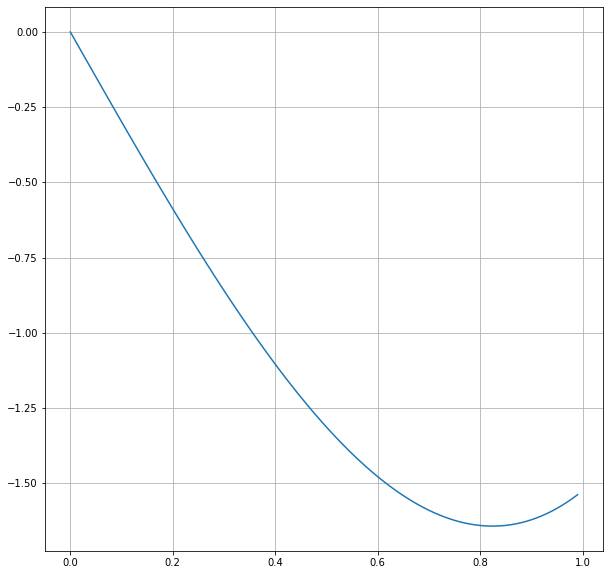

In [65]:
a = 0
b = 1
x = np.arange(a, b, 0.01)
def f(x):
    return x ** 3 - 3 * np.sin(x)
y = f(x)

plt.figure(figsize = (10, 10))
plt.grid()
plt.plot(x, y)

In [70]:
M = 20
eps = np.zeros(M)
count_c_BF = np.zeros(M)
count_i_BF = np.zeros(M)
count_c_BS = np.zeros(M)
count_i_BS = np.zeros(M)
count_c_D = np.zeros(M)
count_i_D = np.zeros(M)
count_c_GS = np.zeros(M)
count_i_GS = np.zeros(M)
count_c_PM = np.zeros(M)
count_i_PM = np.zeros(M)

for i in range(M):
    eps[i] = 2 ** (-(i))
    fm, xm, count_c_BF[i], count_i_BF[i] = BruteForce(f, a, b, eps[i])
    fm, xm, count_c_BS[i], count_i_BS[i] = BitwiseSearch(f, a, b, eps[i])
    fm, xm, count_c_D[i], count_i_D[i] = Dichotomy(f, a, b, eps[i])
    fm, xm, count_c_GS[i], count_i_GS[i] = GoldenSection(f, a, b, eps[i])
    fm, xm, count_c_PM[i], count_i_PM[i] = ParabolaMethod(f, a, b, eps[i])

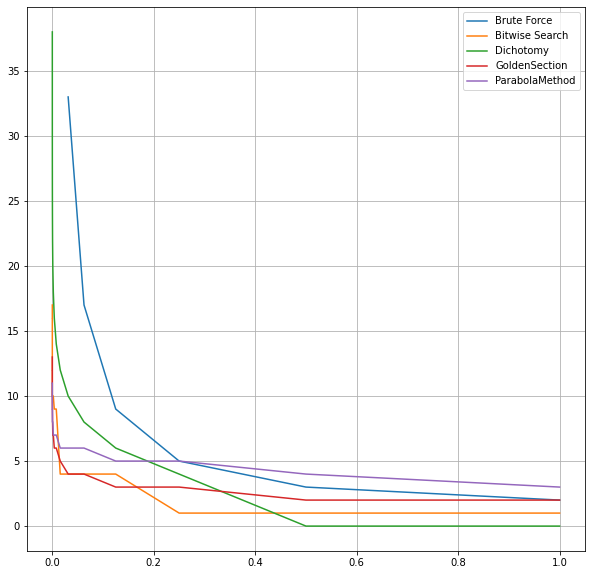

In [71]:
#Зависимость числа вычислений функции от точности
plt.figure(figsize = (10, 10))
plt.grid()
plt.plot(eps[:6], count_c_BF[:6])
plt.plot(eps, count_c_BS)
plt.plot(eps, count_c_D)
plt.plot(eps, count_c_GS)
plt.plot(eps, count_c_PM)
plt.legend(labels = ['Brute Force', 'Bitwise Search', 'Dichotomy', 'GoldenSection', 'ParabolaMethod'])

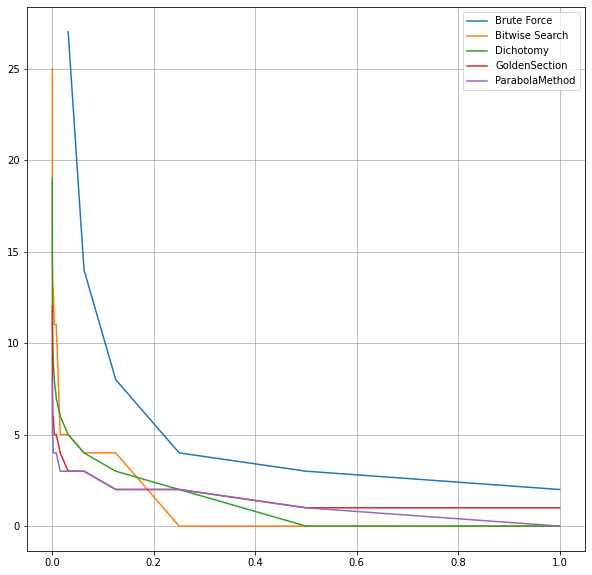

In [72]:
#Зависимость количества итераций от точности
plt.figure(figsize = (10, 10))
plt.grid()
plt.plot(eps[:6], count_i_BF[:6])
plt.plot(eps, count_i_BS)
plt.plot(eps, count_i_D)
plt.plot(eps, count_i_GS)
plt.plot(eps, count_i_PM)
plt.legend(labels = ['Brute Force', 'Bitwise Search', 'Dichotomy', 'GoldenSection', 'ParabolaMethod'])